<a href="https://colab.research.google.com/github/Sankarlalr23/Tensorflow-Keras/blob/main/LR_with_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(70)
data_x = np.linspace(-10.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
# data_y = 29*data_x + 20* np.random.randn(100, 1)  # creating your data
data_x /= np.max(data_x) #scaling
data_x

array([[-1.        ],
       [-0.97979798],
       [-0.95959596],
       [-0.93939394],
       [-0.91919192],
       [-0.8989899 ],
       [-0.87878788],
       [-0.85858586],
       [-0.83838384],
       [-0.81818182],
       [-0.7979798 ],
       [-0.77777778],
       [-0.75757576],
       [-0.73737374],
       [-0.71717172],
       [-0.6969697 ],
       [-0.67676768],
       [-0.65656566],
       [-0.63636364],
       [-0.61616162],
       [-0.5959596 ],
       [-0.57575758],
       [-0.55555556],
       [-0.53535354],
       [-0.51515152],
       [-0.49494949],
       [-0.47474747],
       [-0.45454545],
       [-0.43434343],
       [-0.41414141],
       [-0.39393939],
       [-0.37373737],
       [-0.35353535],
       [-0.33333333],
       [-0.31313131],
       [-0.29292929],
       [-0.27272727],
       [-0.25252525],
       [-0.23232323],
       [-0.21212121],
       [-0.19191919],
       [-0.17171717],
       [-0.15151515],
       [-0.13131313],
       [-0.11111111],
       [-0

In [ ]:
data_x = np.hstack((np.ones_like(data_x), data_x))
data_x

array([[ 1.        , -1.        ],
       [ 1.        , -0.97979798],
       [ 1.        , -0.95959596],
       [ 1.        , -0.93939394],
       [ 1.        , -0.91919192],
       [ 1.        , -0.8989899 ],
       [ 1.        , -0.87878788],
       [ 1.        , -0.85858586],
       [ 1.        , -0.83838384],
       [ 1.        , -0.81818182],
       [ 1.        , -0.7979798 ],
       [ 1.        , -0.77777778],
       [ 1.        , -0.75757576],
       [ 1.        , -0.73737374],
       [ 1.        , -0.71717172],
       [ 1.        , -0.6969697 ],
       [ 1.        , -0.67676768],
       [ 1.        , -0.65656566],
       [ 1.        , -0.63636364],
       [ 1.        , -0.61616162],
       [ 1.        , -0.5959596 ],
       [ 1.        , -0.57575758],
       [ 1.        , -0.55555556],
       [ 1.        , -0.53535354],
       [ 1.        , -0.51515152],
       [ 1.        , -0.49494949],
       [ 1.        , -0.47474747],
       [ 1.        , -0.45454545],
       [ 1.        ,

In [ ]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print(order)
print (test_x.shape, train_x.size, test_y.size, train_y.size)
print (test_x)

[10 17 12 68 38 88 16 27 24 58 40 31 42 85 78 69 37 65 76 66 72 97 98 39
  0 44 45 77 51 21 84  9 96 56  8 74 32  1 60  3 28 62 80 57 18 29  4 34
 25 49 81 93 36 70 71 89 83 43 63 75 92 87 91 73 23 46 48 82 14  5  2 53
 67 59 13 52  7  6 19 20 47 54 99 90 33 41 35 22 61 55 94 30 15 79 86 95
 64 11 26 50]
(20, 2) 160 20 80
[[ 1.         -0.7979798 ]
 [ 1.         -0.65656566]
 [ 1.         -0.75757576]
 [ 1.          0.37373737]
 [ 1.         -0.23232323]
 [ 1.          0.77777778]
 [ 1.         -0.67676768]
 [ 1.         -0.45454545]
 [ 1.         -0.51515152]
 [ 1.          0.17171717]
 [ 1.         -0.19191919]
 [ 1.         -0.37373737]
 [ 1.         -0.15151515]
 [ 1.          0.71717172]
 [ 1.          0.57575758]
 [ 1.          0.39393939]
 [ 1.         -0.25252525]
 [ 1.          0.31313131]
 [ 1.          0.53535354]
 [ 1.          0.33333333]]


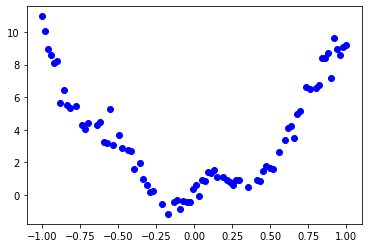

In [ ]:
plt.scatter(train_x[:,1], train_y, c='b', label='Data')
plt.show()

In [ ]:
def get_gradient(w, x, y):
    y_estimate = (np.power(x,2).dot(w)).flatten() #hypothesis
    error = (y.flatten() - y_estimate) 
    mse = (1.0/len(x))*np.sum(np.power(error,2)) # mse
    gradient = -(1.0/len(x)) * error.dot(np.power(x,2))         # gradient
    return gradient, mse

In [ ]:
w = np.random.randn(2) # Random Intialization
alpha = 0.1 # learning rate
tolerance = 1e-3 # param for stopping the loop
print("Intial values of Weights:")
print(w[1], w[0])
# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
#     print(gradient)
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged")
        break
    
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
        print ("Updated Weights : {:f} , {:f}".format(w[1], w[0]))
    iterations += 1
    w = new_w

print ("Final Weights : {:f} , {:f}".format(w[1], w[0]))
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

Intial values of Weights:
-0.4884111631873461 -0.40592300845447754
Iteration: 10 - Error: 9.6594
Updated Weights : 1.225088 , 1.928468
Iteration: 20 - Error: 6.4637
Updated Weights : 2.285847 , 2.577214
Iteration: 30 - Error: 5.3522
Updated Weights : 3.028991 , 2.600323
Iteration: 40 - Error: 4.5621
Updated Weights : 3.640682 , 2.452255
Iteration: 50 - Error: 3.9152
Updated Weights : 4.179441 , 2.266756
Iteration: 60 - Error: 3.3766
Updated Weights : 4.665592 , 2.082400
Iteration: 70 - Error: 2.9274
Updated Weights : 5.107854 , 1.909584
Iteration: 80 - Error: 2.5527
Updated Weights : 5.511268 , 1.750426
Iteration: 90 - Error: 2.2401
Updated Weights : 5.879566 , 1.604668
Iteration: 100 - Error: 1.9794
Updated Weights : 6.215900 , 1.471427
Iteration: 110 - Error: 1.7619
Updated Weights : 6.523074 , 1.349697
Iteration: 120 - Error: 1.5804
Updated Weights : 6.803624 , 1.238506
Iteration: 130 - Error: 1.4291
Updated Weights : 7.059861 , 1.136948
Iteration: 140 - Error: 1.3028
Updated Weight

In [ ]:
print("Final eqn / hypothesis looks like:")
print('y = {:f}.x^2 + {:f}'.format(w[1], w[0]))

Final eqn / hypothesis looks like:
y = 9.681669.x^2 + 0.097791


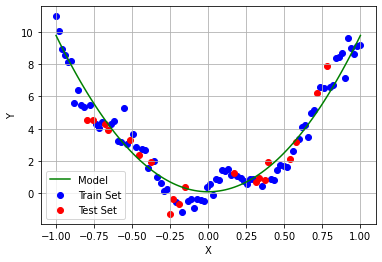

In [ ]:
plt.plot(data_x[:,1], (data_x**2).dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
w # trained model contains values of weights/parameters

array([ -2.54324973, 290.54799256])